### OPA - Analysis of Sales and Valuation Data 2024/25

#### System Setup

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# importing dataset

df = pd.read_csv('all_sales_data_24_25.csv')
df = df.drop(0)
df = df.reset_index(drop = True)
df.head()


,SALE No.,DESPATCH DATE,GRADE,Unnamed: 3,Unnamed: 4,QTY,VALUE,QTY.1,Vlu P,Vlu pro,PROCEEDS,Asking P,Asking Pro,Def,Last bid
0,14.0,02.04.2024,NVK,2047,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN,NaN,NaN
1,14.0,02.04.2024,NaN,2048,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN,NaN,NaN
2,14.0,02.04.2024,NaN,2075,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN,NaN,NaN
3,14.0,02.04.2024,NaN,2073,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN,NaN,NaN
4,14.0,02.04.2024,NaN,2066,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(['GRADE','Unnamed: 3','Def','Last bid'],axis=1)
df = df.rename(columns = {
    'SALE No.' : 'Sale_No.',
    'Unnamed: 4' : 'Grade',
    'DESPATCH DATE' : 'Despatch_Date',
    'QTY' : 'Actual_Quantity',
    'VALUE' : 'Actual_Price',
    'QTY.1' : 'Valuation_Quantity',
    'Vlu P' : 'Valuation_Price',
    'Vlu pro' : 'Valuation_Proceeds',
    'PROCEEDS' : 'Actual_Proceeds',
    'Asking P' : 'Asking_Price',
    'Asking Pro' : 'Asking_Proceeds'
    })

0710851281

In [4]:
df = df[df['Grade'] == 'OPA']
df.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
4,14.0,02.04.2024,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN
5,14.0,02.04.2024,OPA,280,1440.0,280.0,1460.0,408800.0,403200,NaN,NaN
27,14.0,02.04.2024,OPA,880,1280.0,880.0,1250.0,1100000.0,1126400,NaN,NaN
28,14.0,02.04.2024,OPA,880,1260.0,880.0,1240.0,1091200.0,1108800,NaN,NaN
42,15.0,16.04.2024,OPA,260,1500.0,260.0,1450.0,377000.0,390000,NaN,NaN


In [5]:
dfw = df.copy() # dfw refers to dataframe_working (dfw)
dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
4,14.0,02.04.2024,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN
5,14.0,02.04.2024,OPA,280,1440.0,280.0,1460.0,408800.0,403200,NaN,NaN
27,14.0,02.04.2024,OPA,880,1280.0,880.0,1250.0,1100000.0,1126400,NaN,NaN
28,14.0,02.04.2024,OPA,880,1260.0,880.0,1240.0,1091200.0,1108800,NaN,NaN
42,15.0,16.04.2024,OPA,260,1500.0,260.0,1450.0,377000.0,390000,NaN,NaN


#### Data Exploration

In [6]:
dfw.shape

(324, 11)

In [7]:
dfw.columns

Index(['Sale_No.', 'Despatch_Date', 'Grade', 'Actual_Quantity', 'Actual_Price',
       'Valuation_Quantity', 'Valuation_Price', 'Valuation_Proceeds',
       'Actual_Proceeds', 'Asking_Price', 'Asking_Proceeds'],
      dtype='object')

In [8]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 4 to 3350
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_No.            324 non-null    float64
 1   Despatch_Date       324 non-null    object 
 2   Grade               324 non-null    object 
 3   Actual_Quantity     321 non-null    object 
 4   Actual_Price        306 non-null    float64
 5   Valuation_Quantity  322 non-null    float64
 6   Valuation_Price     324 non-null    float64
 7   Valuation_Proceeds  324 non-null    float64
 8   Actual_Proceeds     323 non-null    object 
 9   Asking_Price        252 non-null    float64
 10  Asking_Proceeds     272 non-null    float64
dtypes: float64(7), object(4)
memory usage: 30.4+ KB


In [9]:
dfw.describe()

,Sale_No.,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Asking_Price,Asking_Proceeds
count,324.000000,306.000000,322.000000,324.000000,3.240000e+02,252.000000,2.720000e+02
mean,24.055556,1206.535948,669.422360,1200.077160,7.746960e+05,1246.825397,7.469675e+05
std,11.706816,193.169238,226.658901,195.772449,2.369240e+05,174.477710,3.182949e+05
min,1.000000,790.000000,260.000000,750.000000,0.000000e+00,850.000000,0.000000e+00
25%,16.000000,1065.000000,520.000000,1080.000000,6.500000e+05,1100.000000,6.760000e+05
50%,24.000000,1220.000000,560.000000,1220.000000,7.540000e+05,1290.000000,7.840000e+05
75%,31.000000,1320.000000,880.000000,1300.000000,9.240000e+05,1350.000000,8.800000e+05
max,51.000000,1800.000000,1120.000000,1750.000000,1.590400e+06,1550.000000,1.635200e+06


In [10]:
dfw.nunique()

Sale_No.               51
Despatch_Date          69
Grade                   1
Actual_Quantity        20
Actual_Price           53
Valuation_Quantity     18
Valuation_Price        56
Valuation_Proceeds    137
Actual_Proceeds       141
Asking_Price           30
Asking_Proceeds        74
dtype: int64

In [11]:
dfw['Grade'].unique()

array(['OPA'], dtype=object)

In [12]:
dfw['Grade'].value_counts()

Grade
OPA    324
Name: count, dtype: int64

#### Data Preprocessing

##### Data Cleansing

In [13]:
dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
4,14.0,02.04.2024,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN
5,14.0,02.04.2024,OPA,280,1440.0,280.0,1460.0,408800.0,403200,NaN,NaN
27,14.0,02.04.2024,OPA,880,1280.0,880.0,1250.0,1100000.0,1126400,NaN,NaN
28,14.0,02.04.2024,OPA,880,1260.0,880.0,1240.0,1091200.0,1108800,NaN,NaN
42,15.0,16.04.2024,OPA,260,1500.0,260.0,1450.0,377000.0,390000,NaN,NaN


In [14]:
# handling missing values

dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Quantity        3
Actual_Price          18
Valuation_Quantity     2
Valuation_Price        0
Valuation_Proceeds     0
Actual_Proceeds        1
Asking_Price          72
Asking_Proceeds       52
dtype: int64

In [15]:
# comparing Actual quantity and Valuation Quantity

# extracting numerical values only from the Actual quantity column

dfw["Actual_Quantity_numeric_only"] = dfw["Actual_Quantity"].str.extract(r"(\d+\.?\d*)") # Extract only numbers (integers or decimals)
dfw["Actual_Quantity_numeric_only"] = pd.to_numeric(dfw["Actual_Quantity_numeric_only"]) # Convert to numeric

# comparison

diff_mask = dfw["Actual_Quantity_numeric_only"] != dfw["Valuation_Quantity"]
differences = dfw[diff_mask]

differences


,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds,Actual_Quantity_numeric_only
66,15.0,16.04.2024,OPA,NaN,NaN,880.0,1260.0,1108800.0,0,NaN,NaN,NaN
650,27.0,09.07.2024,OPA,NaN,900.0,NaN,900.0,0.0,0,NaN,0.0,NaN
651,27.0,09.07.2024,OPA,NaN,1500.0,NaN,1500.0,0.0,0,NaN,0.0,NaN
802,30.0,30.07.2024,OPA,Unsold,NaN,880.0,850.0,748000.0,0,1000.0,880000.0,NaN
989,34.0,27.08.2024,OPA,Unsold,NaN,880.0,850.0,748000.0,NaN,1000.0,880000.0,NaN
1948,4.0,2025.01.28,OPA,UNSOLD,NaN,560.0,1460.0,817600.0,0,1550.0,868000.0,NaN
2098,7.0,2025.02.18,OPA,Unsold,NaN,558.0,1500.0,837000.0,0,1550.0,864900.0,NaN
2335,12.0,2025.03.25,OPA,Unsold,NaN,560.0,1380.0,772800.0,0,1400.0,784000.0,NaN
2464,14.0,2025.04.07,OPA,Unsold,NaN,960.0,1220.0,1171200.0,0,1250.0,1200000.0,NaN
2487,15.0,2025.04.22,OPA,Unsold,NaN,560.0,1300.0,728000.0,0,1350.0,756000.0,NaN


In [16]:
# Replace NaN values in Actual_Quantity_numeric_only 
# with corresponding values from Valuation_Quantity

dfw["Actual_Quantity_numeric_only"] = dfw["Actual_Quantity_numeric_only"].fillna(dfw["Valuation_Quantity"])
dfw = dfw.drop(['Actual_Quantity'],axis =1)
dfw = dfw.rename(columns = {
        "Actual_Quantity_numeric_only" : 'Actual_Quantity'
    })

dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          18
Valuation_Quantity     2
Valuation_Price        0
Valuation_Proceeds     0
Actual_Proceeds        1
Asking_Price          72
Asking_Proceeds       52
Actual_Quantity        2
dtype: int64

In [17]:
# Extract text from Actual_Proceeds 

dfw["Actual_Proceeds"] = dfw["Actual_Price"] * dfw["Actual_Quantity"] 
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 4 to 3350
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_No.            324 non-null    float64
 1   Despatch_Date       324 non-null    object 
 2   Grade               324 non-null    object 
 3   Actual_Price        306 non-null    float64
 4   Valuation_Quantity  322 non-null    float64
 5   Valuation_Price     324 non-null    float64
 6   Valuation_Proceeds  324 non-null    float64
 7   Actual_Proceeds     304 non-null    float64
 8   Asking_Price        252 non-null    float64
 9   Asking_Proceeds     272 non-null    float64
 10  Actual_Quantity     322 non-null    float64
dtypes: float64(9), object(2)
memory usage: 30.4+ KB


In [18]:
dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          18
Valuation_Quantity     2
Valuation_Price        0
Valuation_Proceeds     0
Actual_Proceeds       20
Asking_Price          72
Asking_Proceeds       52
Actual_Quantity        2
dtype: int64

In [19]:
# Replace 0 with NaN (null)

dfw = dfw.replace(0, np.nan)
dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          18
Valuation_Quantity     2
Valuation_Price        0
Valuation_Proceeds     2
Actual_Proceeds       20
Asking_Price          72
Asking_Proceeds       76
Actual_Quantity        2
dtype: int64

In [20]:
dfw = dfw.dropna(subset=["Grade","Actual_Price","Actual_Quantity"])

from datetime import datetime

# Function to parse both formats
def parse_mixed_date(date_str):
    for fmt in ("%d.%m.%Y", "%Y.%m.%d"):
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT  # If it doesn't match any format

# Apply the function
dfw["Despatch_Date"] = dfw["Despatch_Date"].apply(parse_mixed_date)

dfw['Despatch_Date'] = dfw['Despatch_Date'].replace('2024-11-19', '2024-11-20')

dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds,Actual_Quantity
4,14.0,2024-04-02,OPA,1460.0,520.0,1450.0,754000.0,759200.0,NaN,NaN,520.0
5,14.0,2024-04-02,OPA,1440.0,280.0,1460.0,408800.0,403200.0,NaN,NaN,280.0
27,14.0,2024-04-02,OPA,1280.0,880.0,1250.0,1100000.0,1126400.0,NaN,NaN,880.0
28,14.0,2024-04-02,OPA,1260.0,880.0,1240.0,1091200.0,1108800.0,NaN,NaN,880.0
42,15.0,2024-04-16,OPA,1500.0,260.0,1450.0,377000.0,390000.0,NaN,NaN,260.0


In [21]:
dfc = dfw.dropna()

In [22]:
dfc.isnull().sum()

Sale_No.              0
Despatch_Date         0
Grade                 0
Actual_Price          0
Valuation_Quantity    0
Valuation_Price       0
Valuation_Proceeds    0
Actual_Proceeds       0
Asking_Price          0
Asking_Proceeds       0
Actual_Quantity       0
dtype: int64

In [23]:
dfc.shape

(233, 11)

In [24]:
# Removing duplicates

dfc.duplicated()
dfc.shape

(233, 11)

In [25]:
dfc.dtypes

Sale_No.                     float64
Despatch_Date         datetime64[ns]
Grade                         object
Actual_Price                 float64
Valuation_Quantity           float64
Valuation_Price              float64
Valuation_Proceeds           float64
Actual_Proceeds              float64
Asking_Price                 float64
Asking_Proceeds              float64
Actual_Quantity              float64
dtype: object

In [26]:

# Columns to sum
sum_cols = ["Valuation_Quantity","Actual_Quantity", "Valuation_Proceeds", "Asking_Proceeds", "Actual_Proceeds"]

# Group by Despatch_Date and sum the specified columns
df_sum = dfc.groupby("Despatch_Date")[sum_cols].sum().reset_index()

# Calculate Actual_Price and Valuation_Price per unit
df_sum["Actual_Price"] = df_sum["Actual_Proceeds"] / df_sum["Actual_Quantity"]
df_sum["Valuation_Price"] = df_sum["Valuation_Proceeds"] / df_sum["Valuation_Quantity"]
df_sum["Asking_Price"] = df_sum["Asking_Proceeds"] / df_sum["Valuation_Quantity"]

# Optional: reorder columns
df_avg = df_sum[["Despatch_Date","Valuation_Price","Asking_Price" ,"Actual_Price",] + sum_cols]

df_avg.head()


,Despatch_Date,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
0,2024-06-18,1174.238579,1299.492386,1184.822335,3940.0,3940.0,4626500.0,5120000.0,4668200.0
1,2024-06-25,1118.464730,1245.850622,1106.307054,4820.0,4820.0,5391000.0,6005000.0,5332400.0
2,2024-07-02,1041.847826,1102.391304,1065.434783,3680.0,3680.0,3834000.0,4056800.0,3920800.0
3,2024-07-09,987.637795,1038.188976,1000.629921,5080.0,5080.0,5017200.0,5274000.0,5083200.0
4,2024-07-16,1009.809524,1067.333333,1056.190476,4200.0,4200.0,4241200.0,4482800.0,4436000.0


In [27]:
df_avg.shape

(54, 9)

### Analysis

#### Descriptive Analysis

In [28]:
df_avg.describe()

,Despatch_Date,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
count,54,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01,5.400000e+01
mean,2025-01-07 17:46:40,1140.049989,1219.143119,1153.642566,2920.555556,2920.555556,3.306615e+06,3.528068e+06,3.332804e+06
min,2024-06-18 00:00:00,900.000000,965.036938,928.112827,440.000000,440.000000,4.312000e+05,4.840000e+05,4.576000e+05
25%,2024-09-19 12:00:00,1016.122181,1124.455338,1066.411583,2080.000000,2080.000000,2.449200e+06,2.640800e+06,2.426300e+06
50%,2024-12-30 12:00:00,1128.446847,1212.754142,1125.570035,3040.000000,3040.000000,3.324600e+06,3.629300e+06,3.403600e+06
75%,2025-04-26 12:00:00,1296.442308,1345.127932,1257.469636,3599.500000,3599.500000,4.206080e+06,4.422100e+06,4.269100e+06
max,2025-08-12 00:00:00,1404.000000,1469.000000,1396.000000,5234.000000,5234.000000,5.801600e+06,6.005000e+06,5.683200e+06
std,NaN,136.721574,121.990099,124.537708,1129.122713,1129.122713,1.258990e+06,1.311401e+06,1.236578e+06


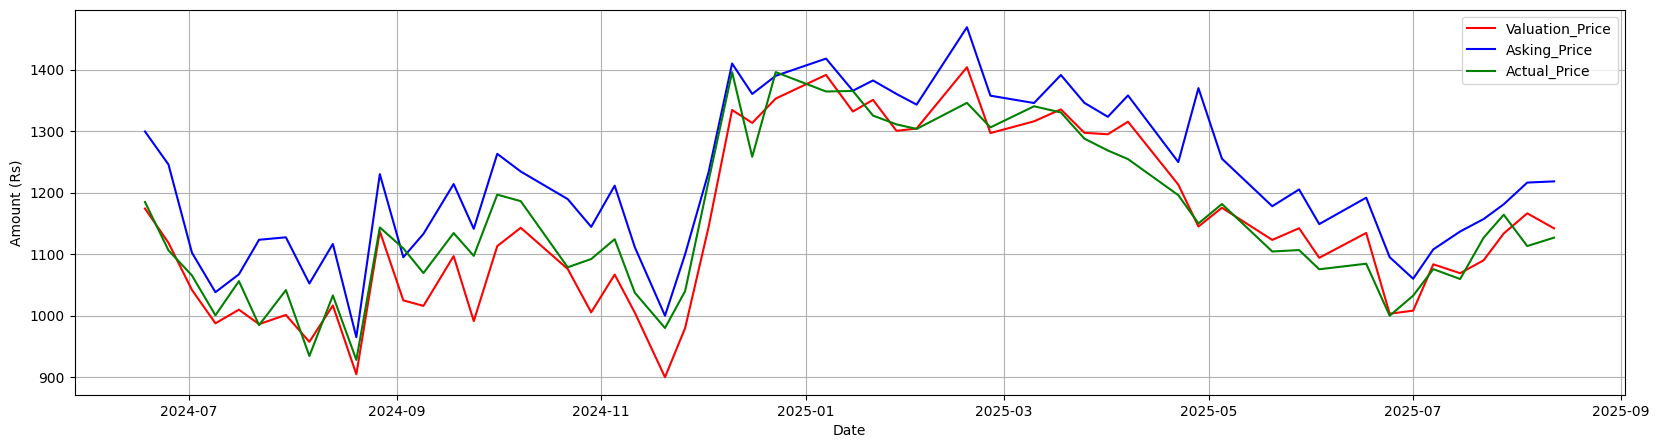

In [29]:
# plotting Valuation_Price , Asking_Price and Actual_Price

plt.figure(figsize=(20,5))
plt.plot(df_avg['Despatch_Date'], df_avg['Valuation_Price'],label = 'Valuation_Price', color = 'red')
plt.plot(df_avg['Despatch_Date'],df_avg['Asking_Price'],label = 'Asking_Price', color = 'blue')
plt.plot(df_avg['Despatch_Date'],df_avg['Actual_Price'],label = 'Actual_Price', color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

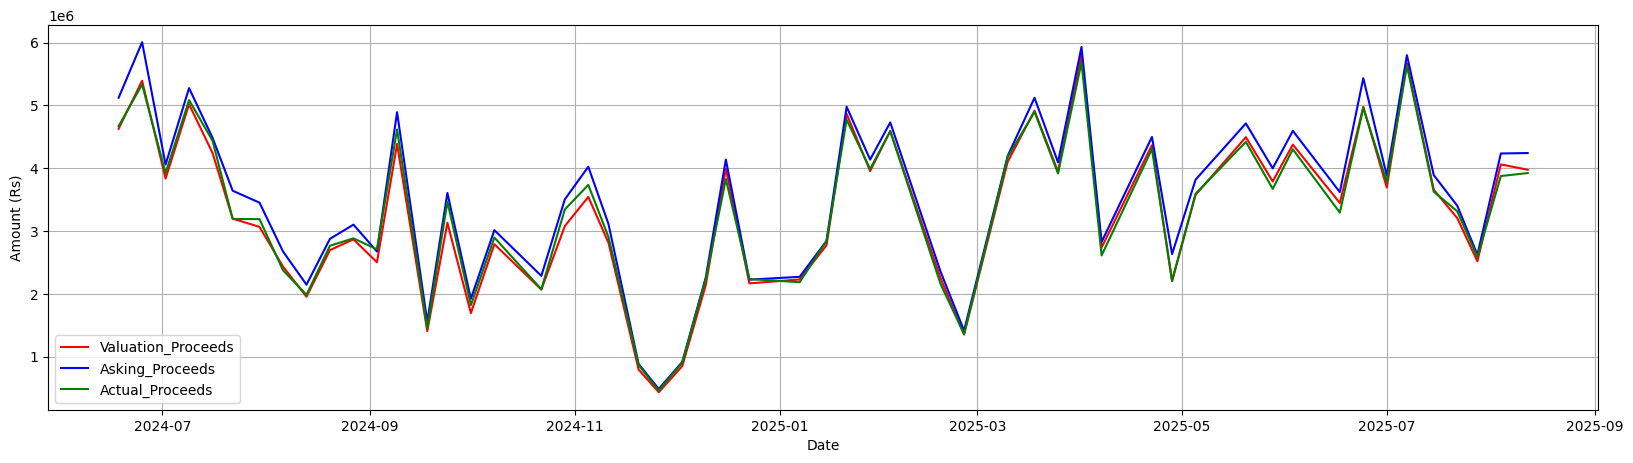

In [30]:
# plotting Valuation_Proceeds , Asking_Proceeds and Actual_Proceeds

plt.figure(figsize=(20,5))
plt.plot(df_avg['Despatch_Date'], df_avg['Valuation_Proceeds'],label = 'Valuation_Proceeds', color = 'red')
plt.plot(df_avg['Despatch_Date'],df_avg['Asking_Proceeds'],label = 'Asking_Proceeds', color = 'blue')
plt.plot(df_avg['Despatch_Date'],df_avg['Actual_Proceeds'],label = 'Actual_Proceeds' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

#### Time Series Analysis

In [31]:
# seting date column as the index column

df_avg = df_avg.set_index('Despatch_Date')

df_weekly = df_avg.resample(
    rule='W-Tue',        # weekly, anchored to Tuesday
    label='left',        # label interval by its start date
    closed='left',       # include left boundary in interval
    origin='2024-06-18'  # start counting weeks from here
).agg({
    'Valuation_Price': 'mean',
    'Asking_Price': 'mean',
    'Actual_Price': 'mean',
    'Valuation_Quantity': 'sum',
    'Actual_Quantity': 'sum',
    'Valuation_Proceeds': 'sum',
    'Asking_Proceeds': 'sum',
    'Actual_Proceeds': 'sum'
})


In [32]:
# handling missing values

df_weekly = df_weekly.fillna(method = 'ffill')
df_weekly.shape

C:\Users\User\AppData\Local\Temp\ipykernel_6388\584053054.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weekly = df_weekly.fillna(method = 'ffill')


(61, 8)

In [33]:

df_weekly = df_weekly.mask(df_weekly == 0.0).ffill()
df_weekly.head()

,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
Despatch_Date,,,,,,,,
2024-06-18,1174.238579,1299.492386,1184.822335,3940.0,3940.0,4626500.0,5120000.0,4668200.0
2024-06-25,1118.464730,1245.850622,1106.307054,4820.0,4820.0,5391000.0,6005000.0,5332400.0
2024-07-02,1041.847826,1102.391304,1065.434783,3680.0,3680.0,3834000.0,4056800.0,3920800.0
2024-07-09,987.637795,1038.188976,1000.629921,5080.0,5080.0,5017200.0,5274000.0,5083200.0
2024-07-16,998.052910,1095.395062,1020.440917,7440.0,7440.0,7436800.0,8122800.0,7626400.0


In [34]:
df_weekly['Actual_Proceeds'].mean()

4452432.131147541

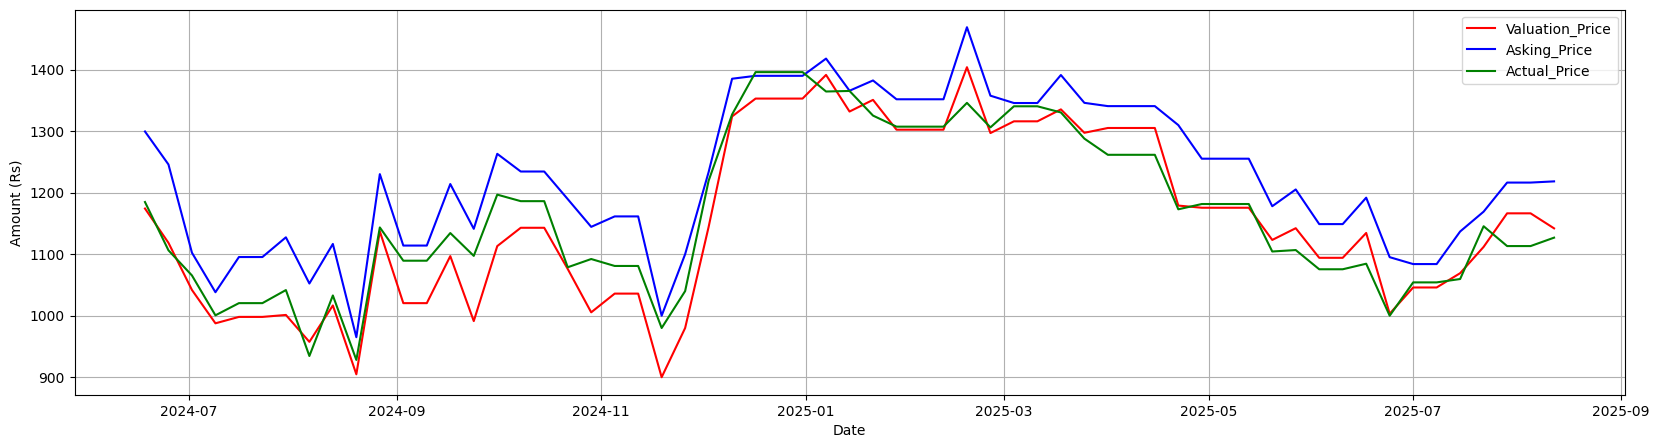

In [35]:
# plotting Valuation_Price , Asking_Price and Actual_Price

plt.figure(figsize=(20,5))
plt.plot(df_weekly['Valuation_Price'],label = 'Valuation_Price', color = 'red')
plt.plot(df_weekly['Asking_Price'],label = 'Asking_Price', color = 'blue')
plt.plot(df_weekly['Actual_Price'],label = 'Actual_Price' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

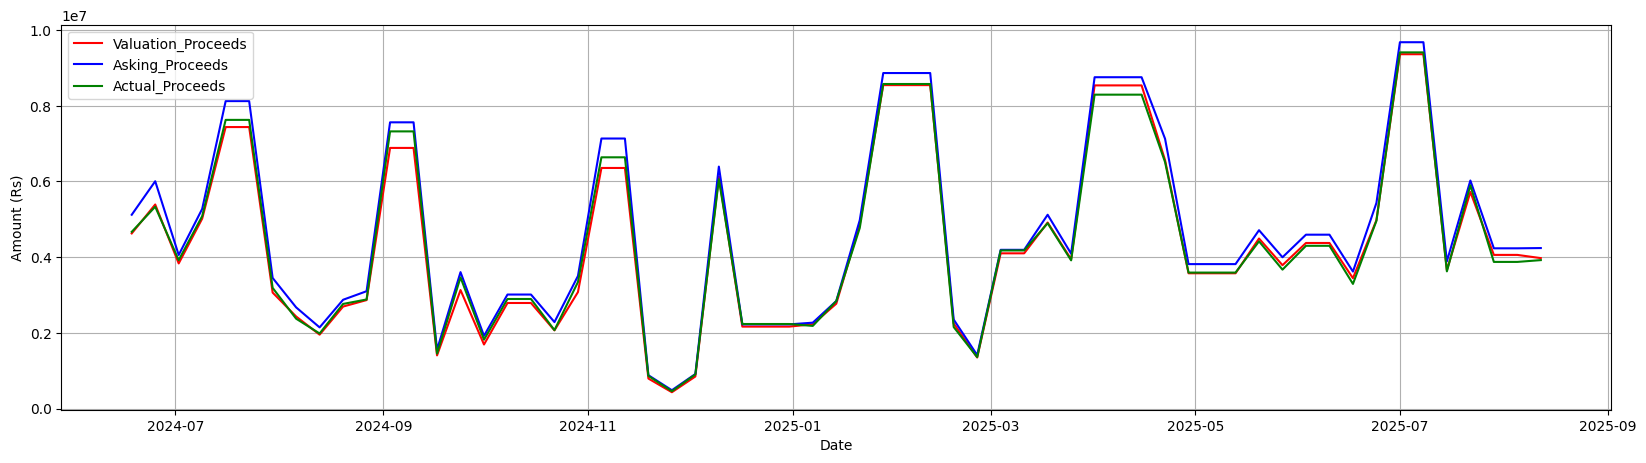

In [36]:
# plotting Valuation_Proceeds , Asking_Proceeds and Actual_Proceeds

plt.figure(figsize=(20,5))
plt.plot(df_weekly['Valuation_Proceeds'],label = 'Valuation_Proceeds', color = 'red')
plt.plot(df_weekly['Asking_Proceeds'],label = 'Asking_Proceeds', color = 'blue')
plt.plot(df_weekly['Actual_Proceeds'],label = 'Actual_Proceeds' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

##### Stationarity

In [37]:
# function to test stationarity

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    # determining rolling statistics
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()

    # plotting rolling statistics
    plt.figure(figsize=(20,5))
    plt.plot(timeseries,label = 'original', color = 'blue')
    plt.plot(rolmean, label = 'Rollin Mean', color ='red')
    plt.plot(rolstd, label =  'Rolling Std', color = 'green')
    plt.xlabel('Date')
    plt.ylabel('Rolling Statistics', size = 15)
    plt.legend()
    plt.grid(True)
    plt.show()

    #dickey fuller test

    print('Results of dickey fuller test:\n')
    adf_test  = adfuller(timeseries, autolag = 'AIC')
    output  = pd.Series(adf_test[0:4], index = ['Test Statistics', 'p-value','No of lags used','No of Observations'])

    for key,value in adf_test[4].items():
        output['critical value(%s)' %key] = value
    print(output)



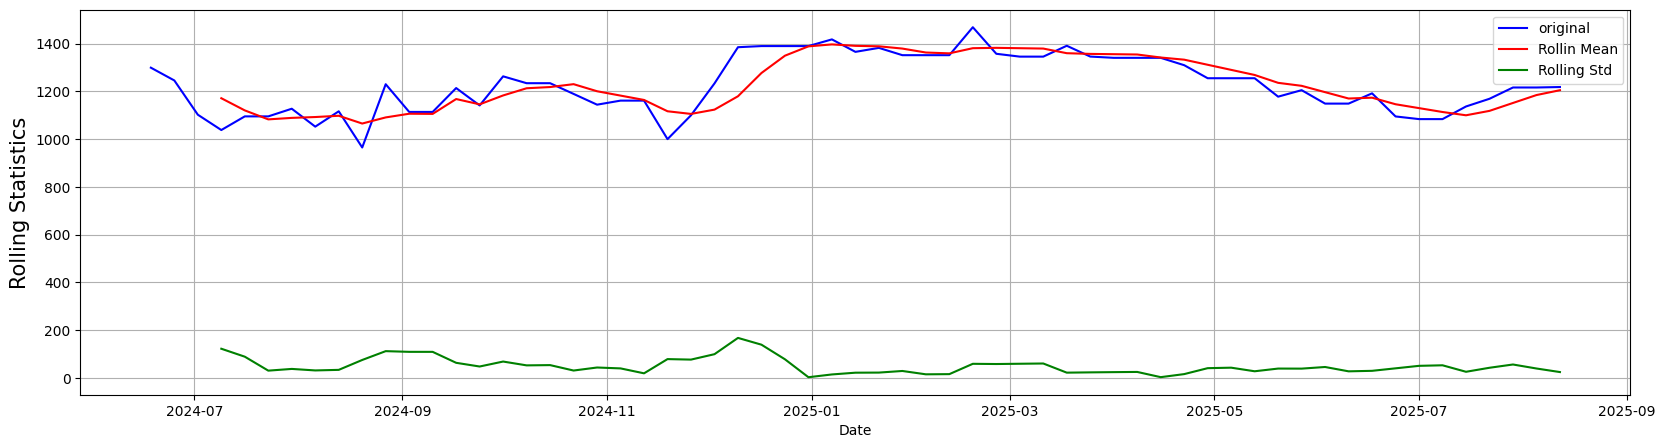

Results of dickey fuller test:

Test Statistics        -2.539963
p-value                 0.106051
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [38]:
test_stationarity(df_weekly['Asking_Price'])

p > 0.05 .Therefore, the actual price time series is not stationary.

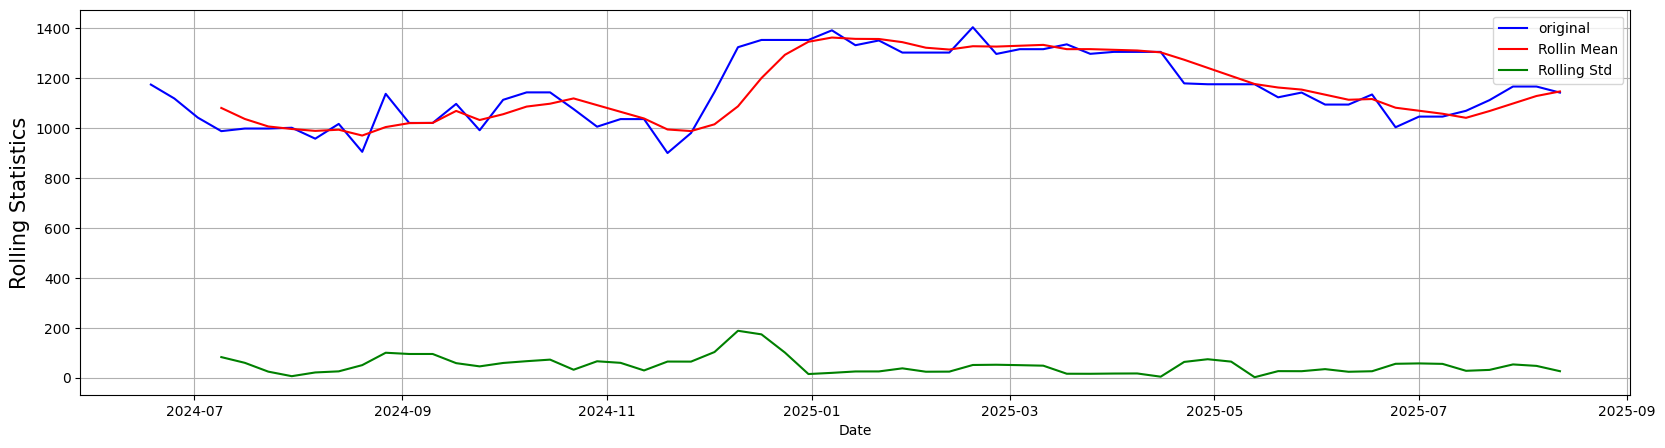

Results of dickey fuller test:

Test Statistics        -2.066345
p-value                 0.258261
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [39]:
test_stationarity(df_weekly['Valuation_Price'])

p > 0.05. Therefore, the Valuation_Price time series is not stationary.

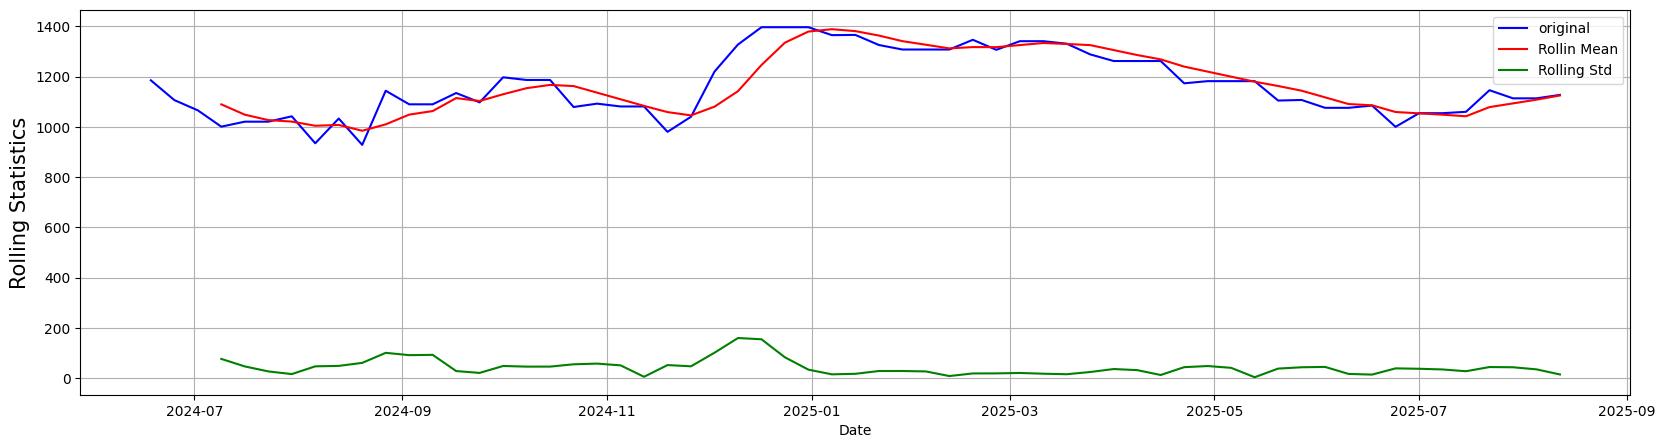

Results of dickey fuller test:

Test Statistics        -1.891334
p-value                 0.336149
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [40]:
test_stationarity(df_weekly['Actual_Price'])

p > 0.05. Therefore, the actual price time series is not stationary.

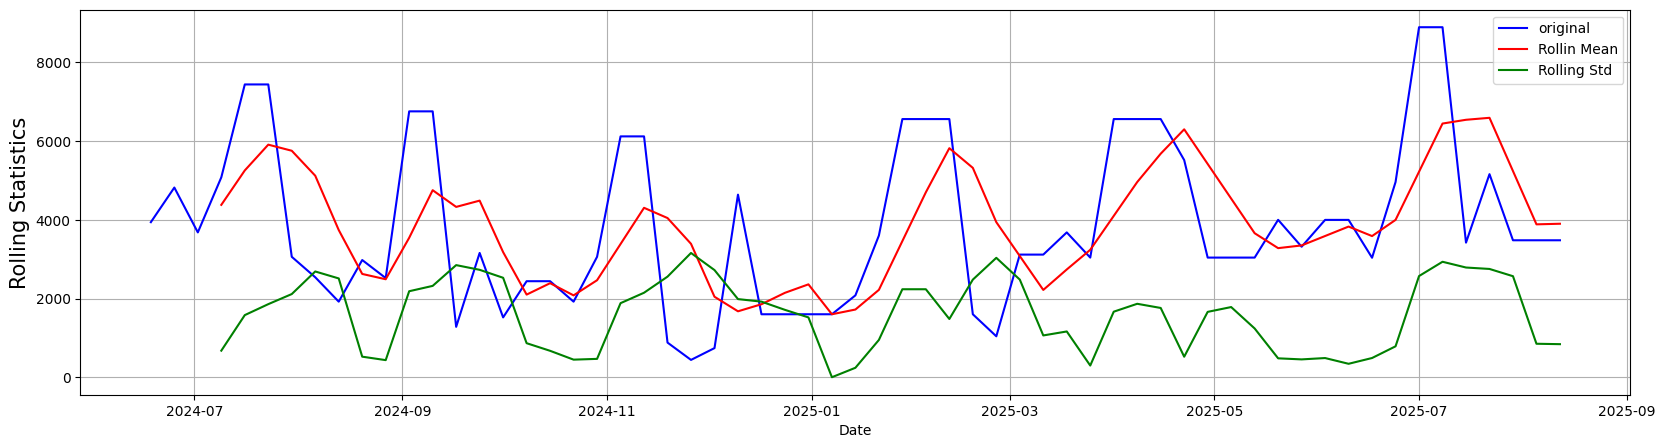

Results of dickey fuller test:

Test Statistics        -4.892296
p-value                 0.000036
No of lags used         1.000000
No of Observations     59.000000
critical value(1%)     -3.546395
critical value(5%)     -2.911939
critical value(10%)    -2.593652
dtype: float64


In [41]:
test_stationarity(df_weekly['Actual_Quantity'])

p < 0.05. Therefore, the actual quantity time series is stationary.

#### Seasonality

<Figure size 640x480 with 0 Axes>

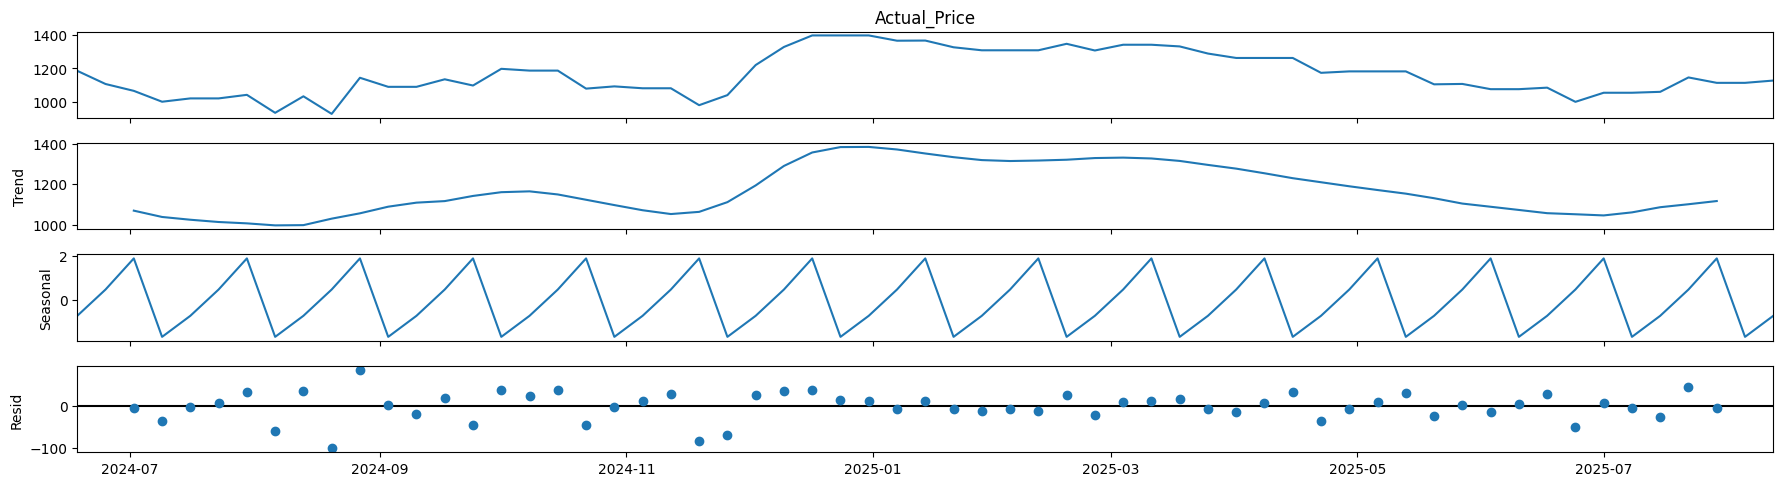

In [42]:
# checking seasonality of prices

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_weekly['Actual_Price'], model= 'additive', period= 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,5)
plt.show()

<Figure size 640x480 with 0 Axes>

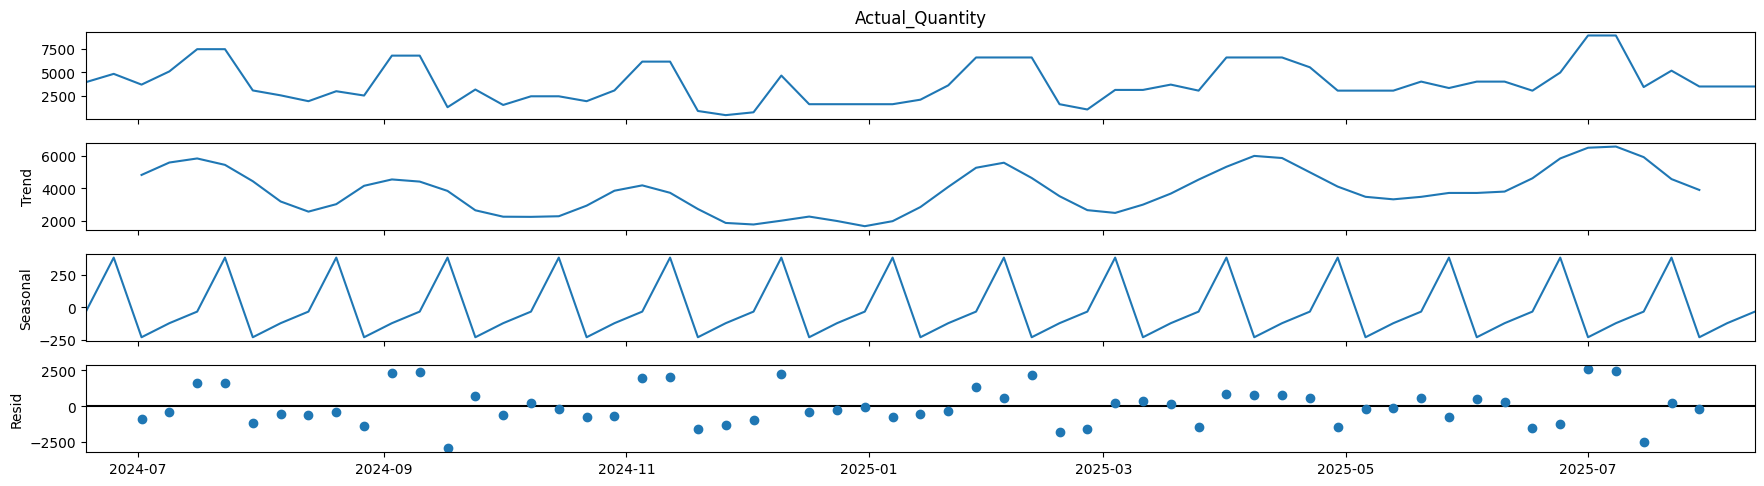

In [43]:
# checking seasonality of quantity

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_weekly['Actual_Quantity'], model= 'additive', period= 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,5)
plt.show()